In [ ]:
from GodotExperimentWrapper import GodotExperimentWrapper
import pandas as pd
import json


config_dict =   { 'EnvConfig' : {
                            'task': 'b_ace_v1',
                            'env_path': 'BVR_AirCombat/bin/B_ACE_v9.exe',
                            'renderize': 1,
                            'experiment_mode'  : 1,
                            'parallel_envs': 5,
                            'seed': 1,
                            'port': 12500,
                            'action_repeat': 20,
                            'speedup': 2000,
                            'action_type': 'Low_Level_Continuous' ,                        
                            'full_observation': 1,
                            'actions_2d': 0
                            },
                        'SimConfig' : {                        
                            'num_allies': 1,
                            'num_enemies': 1,
                            'enemies_behavior': 'baseline1',
                            'agents_behavior' : 'baseline1',
                            'agents_config' : { 
                                'blue_agents': 
                                    {                        
                                        'init_position': {'x': 0.0, 'y': 25000.0,'z': 30.0},
                                        'offset_pos': {	'x': 0.0, 'y': 0.0, 'z': 0.0},
                                        'init_hdg': 0.0,                        
                                        'target_position': {'x': 0.0,'y': 25000.0,'z': -30.0},
                                        'rnd_offset_range':{'x': 15.0,'y': 10000.0,'z': 5.0},
                                        #'rnd_offset_range':{'x': 0.0,'y': 0.0,'z': 0.0},
                                        'rnd_shot_dist_var': 0.1 																						
                                    },                            
                                'red_agents':
                                    { 
                                        'init_position': {'x': 0.0,'y': 25000.0,'z': -30.0},
                                        'offset_pos': {'x': 0.0,'y': 0.0,'z': 0.0},
                                        'init_hdg' : 180.0,                        
                                        'target_position': {'x': 0.0,'y': 25000.0,'z': 30.0},
                                        'rnd_offset_range':{'x': 15.0,'y': 10000.0,'z': 5.0},
                                        #'rnd_offset_range':{'x': 0.0,'y': 0.0,'z': 0.0},
                                        'rnd_shot_dist_var': 0.1					
                                    }   
                            } 
                            
                        },
                        'ExperimentConfig' : {
                            'runs_per_case': 5,
                            'cases': [
                                {'num_enemies': 4, 'num_allies': 4},
                                {'num_enemies': 4, 'num_allies': 4},
                                {'num_enemies': 4, 'num_allies': 4},
                                {'num_enemies': 4, 'num_allies': 4},
                                {'num_enemies': 4, 'num_allies': 4}                                                                   
                                ]
                            }
                    }
        

# Create the GodotExperimentWrapper
env = GodotExperimentWrapper(config_dict)

# Run the experiment
results = env.watch_experiment()
env.close()

# Save the experiment results to a file
with open('experiment_results.json' , "w") as file:
    json.dump(results, file, indent=4)

# Flatten the list of lists into a single list of dictionaries
flat_data = [item for sublist in results for item in sublist]
# Create the DataFrame
df = pd.DataFrame(flat_data)



waiting for remote GODOT connection on port 12305
connection established
1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.20.21.22.23.24.25.26.27.28.29.Experiment Concluded
close message sent


In [5]:
print(sum(df.blues_killed))
print(sum(df.reds_killed))

356
410


<Figure size 1000x600 with 0 Axes>

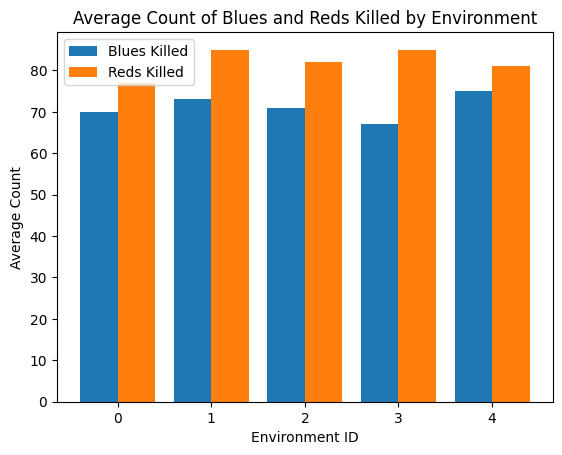

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume the data is stored in a CSV file named 'data.csv'
#df = pd.read_csv('data.csv', sep='\s+')

# Group the data by 'env_id' and calculate the mean of 'blues_killed' and 'reds_killed' for each group
grouped_data = df.groupby('env_id')[['blues_killed', 'reds_killed']].sum()

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', width=0.8)
plt.xlabel('Environment ID')
plt.ylabel('Average Count')
plt.title('Average Count of Blues and Reds Killed by Environment')
plt.xticks(rotation=0)
plt.legend(['Blues Killed', 'Reds Killed'])
plt.show()